# Clustering

*   Clustering means grouping items that are similar to each other.
*   Grouping similar products,  grouping similar articles or documents, and grouping similar customers for market segmentation are all examples of clustering.
*  The core principle of clustering is **minimizing the intra-cluster distance** and **maximizing the intercluster distance**.
*  The intra-cluster  distance is the distance between data items within a group, and the inter-cluster distance is the distance between different groups.
*  The data points are not labeled, so clustering is a  kind of unsupervised problem.
* There are various methods for clustering and each method  uses a different way to group the data points.



## Data preparation

[Swiss dataset](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/swiss.html)

In [1]:
import pandas as pd

In [2]:
swiss=pd.read_csv('../content/swiss.csv')
swiss

,Location,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6
5,Porrentruy,76.1,35.3,9,7,90.57,26.6
6,Broye,83.8,70.2,16,7,92.85,23.6
7,Glane,92.4,67.8,14,8,97.16,24.9
8,Gruyere,82.4,53.3,12,7,97.67,21.0
9,Sarine,82.9,45.2,16,13,91.38,24.4


In [3]:
data_s=swiss[swiss.columns[1:swiss.shape[1]]]
data_s

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,80.2,17.0,15,12,9.96,22.2
1,83.1,45.1,6,9,84.84,22.2
2,92.5,39.7,5,5,93.40,20.2
3,85.8,36.5,12,7,33.77,20.3
4,76.9,43.5,17,15,5.16,20.6
5,76.1,35.3,9,7,90.57,26.6
6,83.8,70.2,16,7,92.85,23.6
7,92.4,67.8,14,8,97.16,24.9
8,82.4,53.3,12,7,97.67,21.0
9,82.9,45.2,16,13,91.38,24.4


## data scaling

In [4]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
# Also we can use data_s=scaler.fit_(data_s).transform(data_s)
data=scaler.fit_transform(data_s)
data

array([[ 8.13834902e-01, -1.49809105e+00, -1.88704610e-01,
         1.07360791e-01, -7.55810460e-01,  7.83415710e-01],
       [ 1.04849895e+00, -2.47440703e-01, -1.32901961e+00,
        -2.08011533e-01,  1.05907526e+00,  7.83415710e-01],
       [ 1.80913415e+00, -4.87779205e-01, -1.45572128e+00,
        -6.28507965e-01,  1.26654617e+00,  8.93433561e-02],
       [ 1.26697928e+00, -6.30202021e-01, -5.68809611e-01,
        -4.18259749e-01, -1.78721399e-01,  1.24046974e-01],
       [ 5.46803395e-01, -3.18652111e-01,  6.46987235e-02,
         4.22733115e-01, -8.72149288e-01,  2.28157827e-01],
       [ 4.82068484e-01, -6.83610577e-01, -9.48914612e-01,
        -4.18259749e-01,  1.19795473e+00,  2.31037489e+00],
       [ 1.10514200e+00,  8.69688258e-01, -6.20029434e-02,
        -4.18259749e-01,  1.25321567e+00,  1.26926636e+00],
       [ 1.80104229e+00,  7.62871146e-01, -3.15406277e-01,
        -3.13135641e-01,  1.35767825e+00,  1.72041339e+00],
       [ 9.91855906e-01,  1.17517762e-01, -5.688

# Finding the number of clusters

## The elbow method

 The elbow method is a well-known method for finding out the best number of clusters. In
 this method, we focus on the percentage of variance for the different numbers of clusters.
 The core concept of this method is to select the number of clusters that appending another
 cluster should not cause a huge change in the variance. We can plot a graph for the sum of
 squares within a cluster using the number of clusters to find the optimal value. The sum of
 squares is also known as the Within-Cluster Sum of Squares (WCSS) or inertia.
 
 $$
 WCSS=\sum_{j=1}^k\sum_{i=1}^ndistance(x_i,c_j)^2
 $$

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss_list=[]
for i in range(1,10):
    kmeans_model=KMeans(n_clusters=i, random_state=1)
    kmeans_model.fit(data)
    # inertia_ is the sum of squared distances of samples to their closest cluster center
    wcss_list.append(kmeans_model.inertia_)

wcss_list

[282.0,
 188.839451181705,
 126.90525972743957,
 104.6383631444091,
 90.06108468841921,
 76.38795471397346,
 67.46778839458733,
 61.60616198518161,
 50.68433245291094]

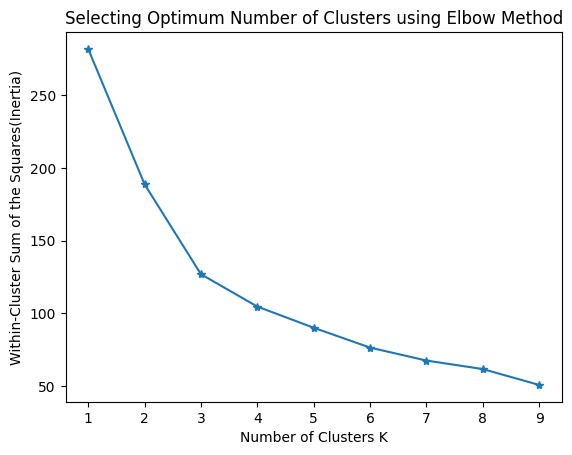

In [7]:
import matplotlib.pyplot as plt
# Plot the inertia(WCSS) and number of clusters
plt.plot(range(1, 10), wcss_list,  marker='*')
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('Within-Cluster Sum of the Squares(Inertia)')
plt.show()

## The silhouette method

 The silhouette method assesses and validates cluster data. It finds how well each data point
 is classified. The plot of the silhouette score helps us to visualize and interpret how well
 data points are tightly grouped within their own clusters and separated from others. It
 helps us to evaluate the number of clusters. Its score ranges from -1 to +1. A positive value
 indicates a well-separated cluster and a negative value indicates incorrectly assigned data
 points. The more positive the value, the further data points are from the nearest clusters; a
 value of zero indicates data points that are at the separation line between two clusters. The formula for the silhouette score:
 
 $$
s(i)=\dfrac{b_i-a_i}{max(b_i,a_i)}
 $$

In [8]:
from sklearn.metrics import silhouette_score

score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=1)
    kmeans_model.fit(data)
    pred = kmeans_model.predict(data)
    score = silhouette_score(data, pred, metric='euclidean')
    score_list.append(score)



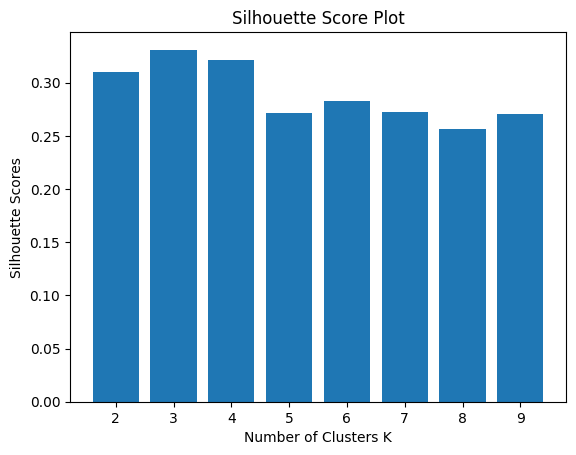

In [9]:
# Plot the Silhouette Score and number of cluster
plt.bar(range(2, 10), score_list)
plt.title('Silhouette Score Plot')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Scores')
plt.show()

We can see the best number of clusters would be 3, the same value provided by the Elbow Method.

# k-means clustering

In [10]:
num_clusters = 3

In [11]:
# Create and fit the KMeans model
km=KMeans(n_clusters=num_clusters, random_state=1)
km.fit(data)
# This is the same as km.labels_
pred=km.predict(data)
pred

array([0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int32)

In [12]:
km.inertia_

126.90525972743957

## Evaluating clustering performance

**Calculate the Silhouette Score for this clustering**

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(data, pred)

np.float64(0.33097897574840873)

**This function returns the Silhouette Coefficient for each sample.**

In [14]:
from sklearn.metrics import silhouette_samples
silhouette_samples(data, pred)

array([ 0.3067417 ,  0.34784857,  0.34404806,  0.11808917,  0.44518226,
        0.20460266,  0.35852147,  0.36923436,  0.40316989,  0.24216268,
        0.39144485,  0.44889889,  0.46625774,  0.43703211,  0.49046662,
        0.32796309,  0.51353323,  0.29103102,  0.10275304,  0.47961507,
        0.51791122,  0.4221211 ,  0.32158078,  0.3927922 ,  0.32351478,
        0.31540332,  0.25483646,  0.4486088 , -0.00950228,  0.45514351,
        0.29482115,  0.37963844,  0.40084124,  0.34673491,  0.45145845,
        0.26549367,  0.35467654,  0.29627996,  0.36536267, -0.12094042,
        0.25384992,  0.24808466,  0.44759351,  0.27608576,  0.35192521,
        0.11085332,  0.30224652])

We can see there are negative values, which means son points are in the "wrong" cluster.

**Observations in the wrong clusters**

In [15]:
silhouette_vals=silhouette_samples(data, pred)
swiss[silhouette_vals<0]

,Location,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
28,Vevey,58.3,26.8,25,19,18.46,20.9
39,La Chauxdfnd,65.7,7.7,29,11,13.79,20.5


**Silhouette chart generation**

In [16]:
import numpy as np

# .np.unique() returns the unique elements of an array sorted.
cluster_labels = np.unique(pred)
cluster_labels

array([0, 1, 2], dtype=int32)

In [17]:
from matplotlib import cm
import numpy as np

cm class: builtin colormaps, colormap handling utilities.

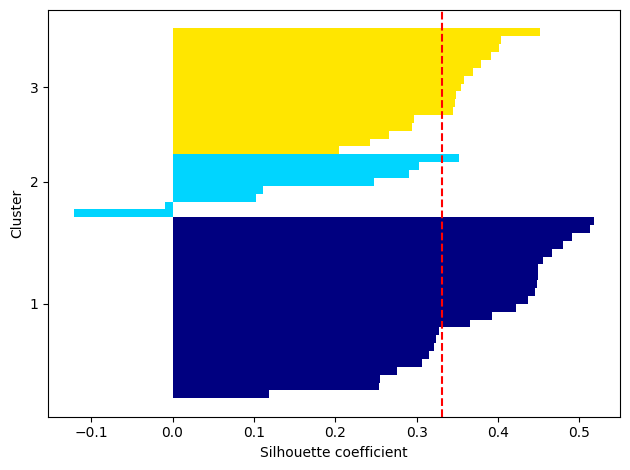

In [18]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
# enumerate allows i to be the index of the loop and c to be the value of the cluster_labels
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[pred == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / num_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
#Procedures that adjust the parameters of the plot so that they are well matched to the figure.
plt.tight_layout()
plt.show()

## Yellowbrick

Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier. Under the hood, it's using Matplotlib.

SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(n_clusters=3, random_state=1))

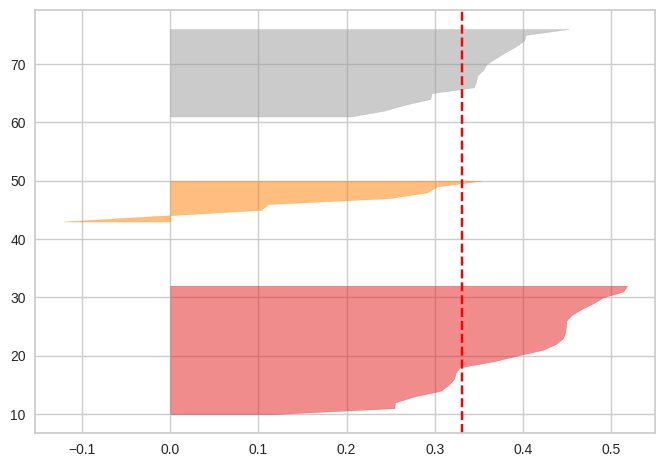

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(km)
visualizer.fit(data)
#visualizer.show()

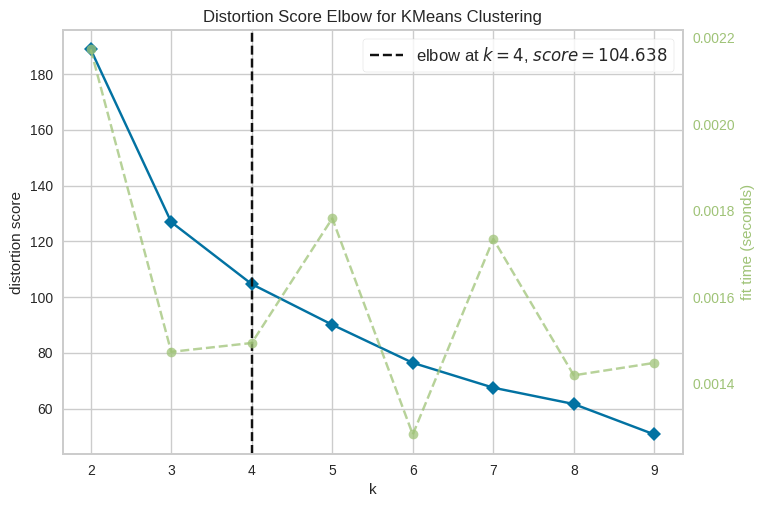

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(data)
visualizer.show()

 the within-cluster SSE (distortion)
 The KElbowVisualizer also displays the amount of time to train the clustering model as a dashed green line, but is can be hidden by setting timings=False.

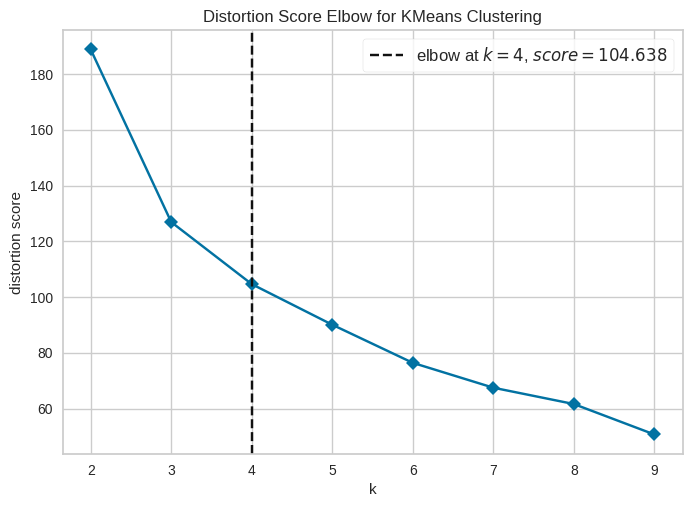

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
visualizer = KElbowVisualizer(km, k=(2,10), timings=False)

visualizer.fit(data)
visualizer.show()

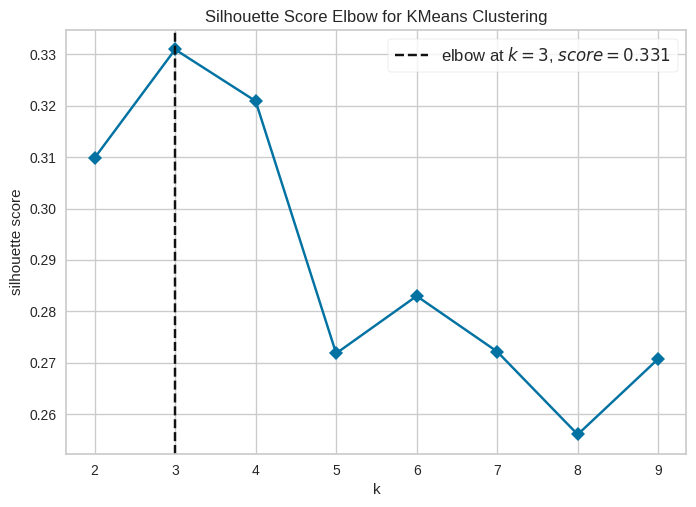

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [22]:
visualizer = KElbowVisualizer(km, k=(2,10), timings=False, metric='silhouette')

visualizer.fit(data)
visualizer.show()

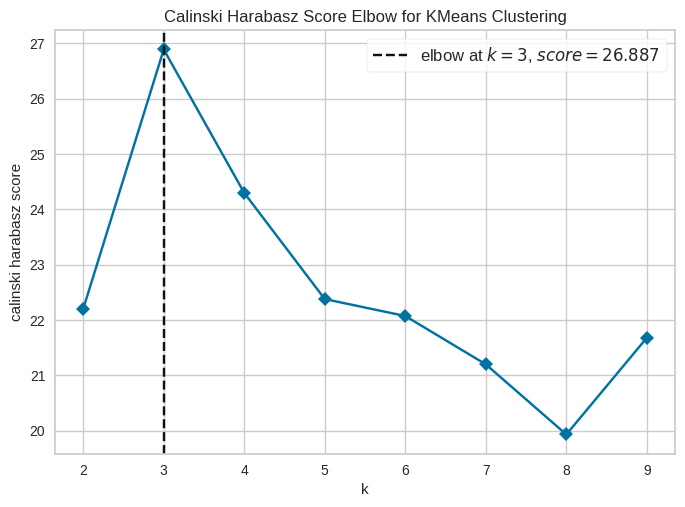

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [23]:
visualizer = KElbowVisualizer(km, k=(2,10), timings=False, metric='calinski_harabasz')

visualizer.fit(data)
visualizer.show()

Calinski Harabasz Index is defined as the ratio of the between-cluster separation (BCSS) to the within-cluster dispersion (WCSS).

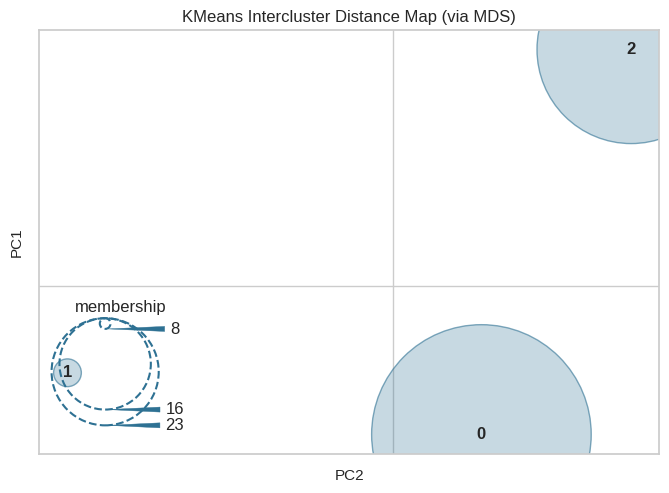

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [24]:
from yellowbrick.cluster import InterclusterDistance

visualizer = InterclusterDistance(KMeans(n_clusters=num_clusters, init='k-means++', random_state=1))

visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()

Intercluster distance maps display an embedding of the cluster centers in 2 dimensions with the distance to other centers preserved. E.g. the closer to centers are in the visualization, the closer they are in the original feature space. The clusters are sized according to a scoring metric. By default, they are sized by membership, e.g. the number of instances that belong to each center. This gives a sense of the relative importance of clusters. Note however, that because two clusters overlap in the 2D space, it does not imply that they overlap in the original feature space.

# Description of the obtained clusters

In [25]:
num_clusters = 3
km=KMeans(num_clusters, random_state=1)
km.fit(data)
pred=km.predict(data)
pred

array([0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int32)

In [26]:
data_s['cluster']=pred
data_s

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,cluster
0,80.2,17.0,15,12,9.96,22.2,0
1,83.1,45.1,6,9,84.84,22.2,2
2,92.5,39.7,5,5,93.40,20.2,2
3,85.8,36.5,12,7,33.77,20.3,0
4,76.9,43.5,17,15,5.16,20.6,0
5,76.1,35.3,9,7,90.57,26.6,2
6,83.8,70.2,16,7,92.85,23.6,2
7,92.4,67.8,14,8,97.16,24.9,2
8,82.4,53.3,12,7,97.67,21.0,2
9,82.9,45.2,16,13,91.38,24.4,2


In [27]:
print("Cluster Summary:")
summary=data_s.groupby('cluster').mean()
summary['count']=data_s['cluster'].value_counts()
summary=summary.sort_values('count', ascending=False)
summary

Cluster Summary:


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,count
cluster,,,,,,,
0,69.0000,50.891304,17.521739,8.217391,7.862174,19.73913,23
2,80.5500,65.518750,9.437500,6.625000,96.150000,20.77500,16
1,52.6125,20.275000,27.625000,27.625000,26.816250,18.86250,8


<Axes: >

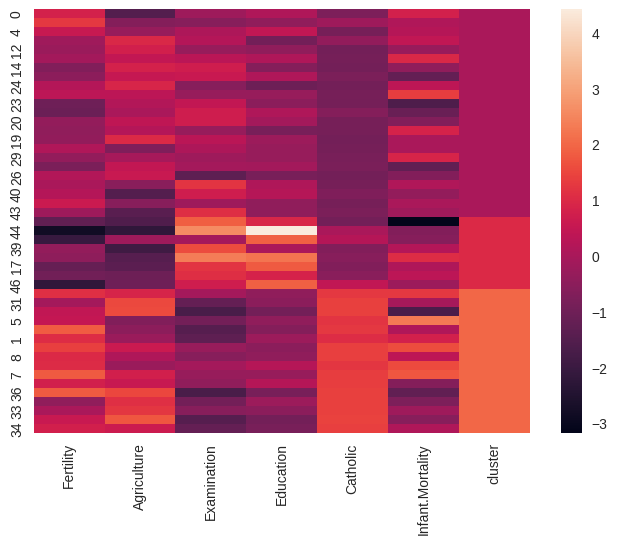

In [28]:
import seaborn as sns

df=pd.DataFrame(data=data,columns=data_s.columns[:-1])
df['cluster']=pred
df.sort_values(by='cluster',ascending=True, inplace=True)

sns.heatmap(df)

<Axes: >

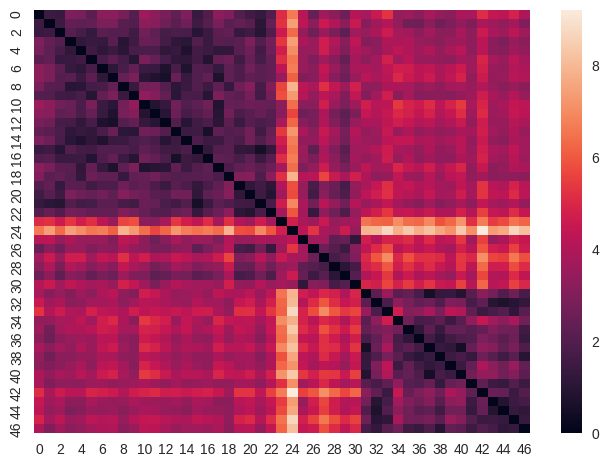

In [29]:
from scipy.spatial.distance import pdist, squareform
# Matrix of pairwise distances between all observations.
dist = pdist(df, metric='euclidean')
dist = squareform(dist)
sns.heatmap(dist)

Distance matrix computation from a collection of raw observation vectors stored in a rectangular array.

[scipy](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)